In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cluster import KMeans

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')

In [4]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

In [8]:
dataset['Gender'] = encoder.fit_transform(dataset['Gender'])

In [9]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int32
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 7.2 KB


In [11]:
dataset.shape

(200, 5)

In [13]:
dataset.drop('CustomerID',axis=1,inplace=True)

In [14]:
dataset.shape

(200, 4)

In [16]:
# Choosing only last two column only others are not that much useful

X = dataset.iloc[:,[2,3]].values

In [18]:
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

In [23]:
# Choosing the number correct clusters
# WCSS -> Within cluster sum of squares

# finding the wcss for different number of clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)  # X is your dataset
    wcss.append(kmeans.inertia_)

print(f"Length of wcss: {len(wcss)}")
print(f"WCSS values: {wcss}")

Length of wcss: 10
WCSS values: [269981.28, 183653.3289473684, 106348.37306211119, 73880.64496247195, 44448.45544793371, 40825.16946386947, 33642.57922077922, 26686.837785187785, 24766.47160979344, 23103.122085983916]


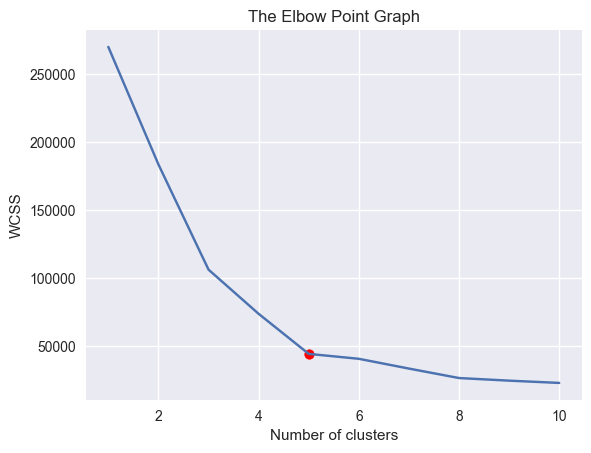

In [29]:
sns.set()
plt.plot(range(1, 11), wcss)
plt.scatter(5,wcss[4],color='Red')
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
# here's the Optimnum number of cluster is Five 
# the Elbow point is (5,wcss[4]) there was no significant downfall so we came over this

# Training the k-Means Clustering Model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

In [31]:
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [32]:
y = kmeans.predict(X)

In [33]:
print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


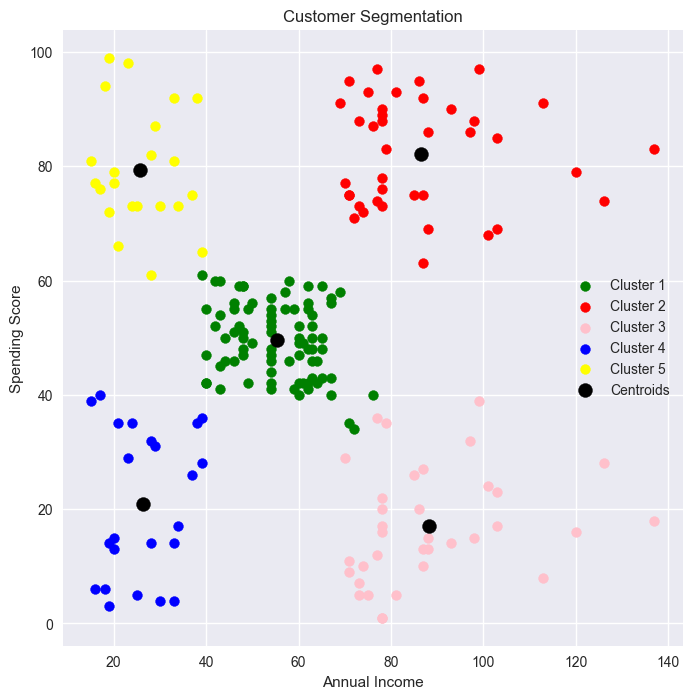

In [40]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[y==0,0], X[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[y==1,0], X[y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[y==2,0], X[y==2,1], s=50, c='pink', label='Cluster 3')
plt.scatter(X[y==3,0], X[y==3,1], s=50, c='blue', label='Cluster 4')
plt.scatter(X[y==4,0], X[y==4,1], s=50, c='yellow', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title("Customer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()